# Economotrics Project (BGD708)

#### Author: 
Alban Pereira (alban.pereira@telecom-paris.fr)

Laurent Gayraud (laurent.gayraud@telecom-paris.fr)

## Imports

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## PART 1 - CROSS-SECTION DATA

This part uses the dataset HPRICE2.RAW described in HPRICE2.DES.

In [5]:
df = pd.read_csv('data/HPRICE2.raw', delim_whitespace=True, header=None)

# Assuming the first row is not a header based on the description file, let's set the column names
columns = [
    "price", "crime", "nox", "rooms", "dist", "radial", "proptax", "stratio",
    "lowstat", "lprice", "lnox", "lproptax"
]
df.columns = columns

df.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678


In [2]:
# Load the content of the HPRICE2.DES file to understand its structure and information provided.
description_file_path = 'data/HPRICE2.DES'

with open(description_file_path, 'r') as file:
    description_content = file.read()

# Show the first 500 characters to get an idea of the content
description_content[:500]

'HPRICE2.DES\n\nprice     crime     nox       rooms     dist      radial    proptax   stratio  \nlowstat   lprice    lnox      lproptax  \n\n  Obs:   506\n\n  1. price                    median housing price, $\n  2. crime                    crimes committed per capita\n  3. nox                      nitrous oxide, parts per 100 mill.\n  4. rooms                    avg number of rooms per house\n  5. dist                     weighted dist. to 5 employ centers\n  6. radial                   accessibiliy index '

The HPRICE2.DES file describes a dataset containing 506 observations with the following variables:
1. price                    median housing price, $
2. crime                    crimes committed per capita
3. nox                      nitrous oxide, parts per 100 mill.
4. rooms                    avg number of rooms per house
5. dist                     weighted dist. to 5 employ centers
6. radial                   accessibiliy index to radial hghwys
7. proptax                  property tax per $1000
8. stratio                  average student-teacher ratio
9. lowstat                  % of people 'lower status'
10. lprice                   log(price)
11. lnox                     log(nox)
12. lproptax                 log(proptax)

#### Q1. State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased.

To ensure that the Ordinary Least Squares (OLS) estimators are unbiased, the fundamental hypothesis is the Linear Regression Model assumptions, specifically:

1. Linearity in Parameters: The model in which we are estimating the parameters must be linear in parameters. This does not mean the model must be linear in variables; for example, a model can include squared terms or interaction terms and still be considered linear in parameters.

2. Random Sampling: The data used to estimate the model is assumed to be a random sample of the population.

3. No Perfect Multicollinearity: There must not be perfect multicollinearity in the model. In other words, no independent variable is a perfect linear combination of the others.

4. Zero Conditional Mean: The expected value of the error term (u) given any value of the independent variables (X) is zero, $E(u∣X) = 0$. This assumption is crucial because it implies that the error term does not systematically vary with the independent variables. When this condition is violated, it often indicates omitted variable bias where the omitted variable is correlated with both the independent variable(s) and the dependent variable.

5. Homoscedasticity (optional for unbiasedness but necessary for efficiency and for conducting valid hypothesis tests using standard errors): The variance of the error terms is constant across all levels of the independent variables. When this assumption is violated, it is referred to as heteroscedasticity.

When these conditions are met, the OLS estimators provide unbiased estimates of the regression coefficients.

#### Q2. Show that under this assumption the OLS estimators are indeed unbiased.

Under the assumption that $E(u|X) = 0$, where $u$ is the error term and $X$ represents the independent variables, OLS estimators $\hat{\beta}$ are unbiased. This is shown as follows:

Given a linear model $Y = X\beta + u$,

1. The OLS estimator $\hat{\beta}$ is given by $\hat{\beta} = (X'X)^{-1}X'Y$.
2. Substituting $Y = X\beta + u$ into the estimator equation gives $\hat{\beta} = (X'X)^{-1}X'(X\beta + u)$.
3. Simplifying, $\hat{\beta} = \beta + (X'X)^{-1}X'u$.

Taking the expectation:

4. $E(\hat{\beta}) = E(\beta + (X'X)^{-1}X'u) = \beta + (X'X)^{-1}X'E(u)$.

Given $E(u|X) = 0$, it follows that $E(u) = 0$, so:

5. $E(\hat{\beta}) = \beta$.

Therefore, under the assumption $E(u|X) = 0$, the OLS estimators $\hat{\beta}$ are unbiased, meaning $E(\hat{\beta}) = \beta$.

#### Q3. Explain the sample selection bias with an example from the course.

Sample selection bias occurs when the sample does not represent the population accurately, leading to biased estimates.

An example from the course is the study of fertilizer's effect on crop yield. If more fertilizer is systematically applied to inherently more fertile land, the analysis may incorrectly attribute the higher yield to the fertilizer, overlooking the land's inherent fertility. This happens because the selection of plots for fertilization is influenced by an unobserved factor (land fertility) that also affects the outcome (yield), causing an overestimation of the fertilizer's effect. Correcting this bias requires techniques to account for such unobserved variables.

#### Q4. Explain the omitted variable bias with an example from the course.

Omitted variable bias happens when a relevant variable is left out of a model, causing biased estimates of other variables' effects.

An example from the course related to the effect of education on wages might illustrate this concept well. If we examine how education affects wages without accounting for work experience, we might overstate education's impact. This is because both education and work experience influence wages, but omitting work experience means part of the observed effect of education on wages may actually be due to work experience, which is correlated with education.

#### Q5. Explain the problem of multicollinearity. Is it a problem in this dataset?

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to isolate the individual effect of each variable on the dependent variable. This doesn't bias the estimates themselves, but it can make the estimates very sensitive to changes in the model or data, leading to large variances for the coefficient estimates, which undermines the statistical significance of the independent variables.

To determine if multicollinearity is a problem in the provided dataset, we can examine the correlation matrix of the independent variables or calculate the Variance Inflation Factor (VIF) for each independent variable. A VIF value greater than 10 (or, more conservatively, greater than 5) is often considered indicative of multicollinearity.

In [11]:
# Calculate the correlation matrix for the independent variables in the dataset to assess multicollinearity
correlation_matrix = df.drop(['price', 'lprice'], axis=1).corr()

# Display the correlation matrix
correlation_matrix

,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lnox,lproptax
crime,1.000000,0.421152,-0.218816,-0.379909,0.625442,0.582819,0.288691,0.447033,0.429639,0.551393
nox,0.421152,1.000000,-0.302828,-0.770222,0.610328,0.666981,0.186863,0.585613,0.993943,0.659206
rooms,-0.218816,-0.302828,1.000000,0.205410,-0.209773,-0.292120,-0.354008,-0.609605,-0.304988,-0.299269
dist,-0.379909,-0.770222,0.205410,1.000000,-0.495065,-0.534379,-0.229269,-0.495602,-0.808795,-0.513897
radial,0.625442,0.610328,-0.209773,-0.495065,1.000000,0.910228,0.464244,0.476038,0.624171,0.863531
proptax,0.582819,0.666981,-0.292120,-0.534379,0.910228,1.000000,0.454238,0.527624,0.677314,0.988586
stratio,0.288691,0.186863,-0.354008,-0.229269,0.464244,0.454238,1.000000,0.365402,0.227910,0.422231
lowstat,0.447033,0.585613,-0.609605,-0.495602,0.476038,0.527624,0.365402,1.000000,0.596220,0.510948
lnox,0.429639,0.993943,-0.304988,-0.808795,0.624171,0.677314,0.227910,0.596220,1.000000,0.667252
lproptax,0.551393,0.659206,-0.299269,-0.513897,0.863531,0.988586,0.422231,0.510948,0.667252,1.000000


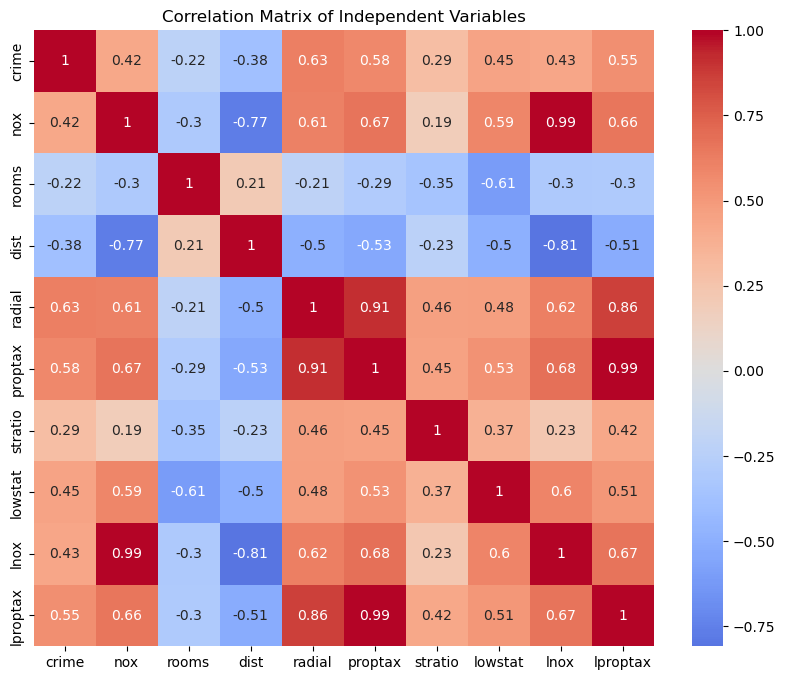

In [12]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

The correlation matrix and the heatmap reveal several pairs of independent variables with high correlation coefficients, indicating potential multicollinearity issues in the dataset. For example:

- <i>nox</i> and <i>lnox</i> have a very high correlation near 1, which is expected since <i>lnox</i> is the logarithm of <i>nox</i>.
- <i>proptax</i> and <i>lproptax</i> also show a very high correlation for the same reason.
- <i>radial</i> and <i>proptax</i> have a correlation coefficient of 0.91, suggesting a strong linear relationship.
- <i>dist</i> and <i>nox</i> have a negative correlation of -0.77, indicating that as the distance from employment centers increases, the concentration of nitrous oxides decreases.

#### Q6. Create three categories of nox levels (low, medium, high), corresponding to the following percentiles: 0-25%, 26%-74%, 75%-100%

In [14]:
# Calculate the percentiles for the 'nox' variable
nox_sorted = df['nox'].sort_values()
n = len(nox_sorted)
index_25th = int(n * 0.25)
index_75th = int(n * 0.75)

# Get the values at the 25th and 75th percentiles
value_25th = nox_sorted.iloc[index_25th]
value_75th = nox_sorted.iloc[index_75th]

# Create categories based on these percentiles
df['nox_category'] = pd.cut(df['nox'], bins=[nox_sorted.min(), value_25th, value_75th, nox_sorted.max()], labels=['low', 'medium', 'high'], include_lowest=True)

# Display the distribution of the new categories
df['nox_level'].value_counts()

nox_level
Medium    254
Low       128
High      124
Name: count, dtype: int64

#### Q7. Compute for each category of <i>nox</i> level the average median price and comment on your results.

In [16]:
# Compute for each category of nox level the average median price and comment on your results
df.groupby('nox_category')['price'].median()

nox_category
low       24349.0
medium    21150.0
high      14250.0
Name: price, dtype: float64

<b>Commentary :</b>

These results indicate a clear negative relationship between the levels of nitrous oxide (<i>nox</i>) and the average median <i>price</i> of housing. As the <i>nox</i> level increases from low to high, the average median price decreases significantly. This suggests that higher levels of pollution (as indicated by higher <i>nox</i> levels) are associated with lower housing <i>prices</i>, which could be due to lower desirability of living in more polluted areas.

#### Q8. Produce a scatter plot with the variable <i>price</i> on the y-axis and the variable <i>nox</i> on the x-axis. Is this a ceteris paribus effect?

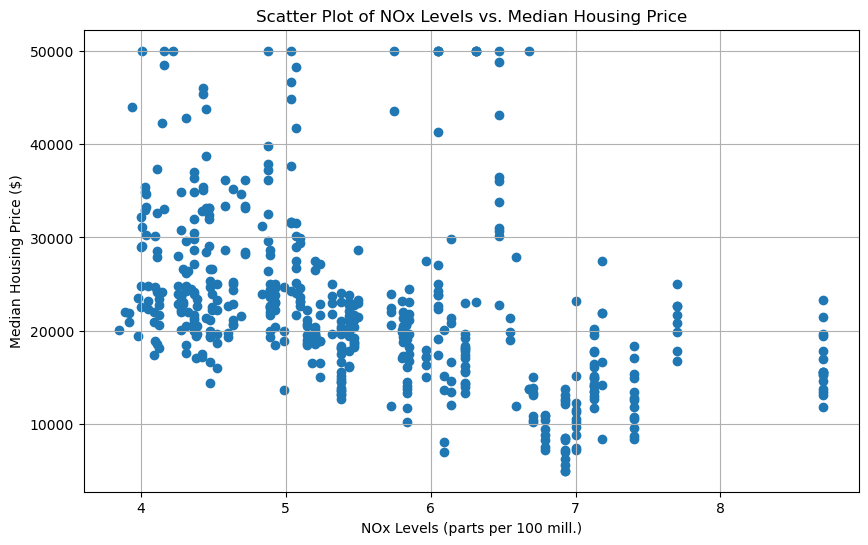

In [19]:
# Plotting the scatter plot of 'nox' vs 'price'
plt.figure(figsize=(10, 6))
plt.scatter(df['nox'], df['price'])
plt.title('Scatter Plot of NOx Levels vs. Median Housing Price')
plt.xlabel('NOx Levels (parts per 100 mill.)')
plt.ylabel('Median Housing Price ($)')
plt.grid(True)
plt.show()

<b> Commentary : </b>

The scatter plot of NOx levels versus median housing prices shows a general trend where housing prices tend to decrease as NOx levels increase. This visual trend supports the idea that areas with higher pollution levels (as measured by NOx) tend to have lower housing prices.

No, this scatter plot does not represent a ceteris paribus effect.

In a ceteris paribus analysis, we examine the effect of changing one variable while keeping all other variables constant. However, in a scatter plot like the one created here, each data point represents a unique observation where multiple variables, including <i>nox</i> and <i>price</i>, can vary simultaneously.

Therefore, without controlling for other variables, we cannot isolate the effect of <i>nox</i> on <i>price</i> while holding all other variables constant.

To perform a ceteris paribus analysis, we would typically use techniques like regression analysis, where we can control for the effects of other variables while examining the relationship between <i>nox</i> and <i>price</i>.

#### Q9. Run a regression of <i>price</i> on a <i>constant</i>, <i>crime</i>, <i>nox</i>, <i>rooms</i>, <i>proptax</i>. Comment on the histogram of the residuals. Interpret all coefficients.

#### Q10. Run a regression of <i>lprice</i> on a <i>constant</i>, <i>crime</i>, <i>nox</i>, <i>rooms</i>, <i>proptax</i>. Interpret all coefficients.

#### Q11. Run a regression of <i>lprice</i> on a <i>constant</i>, <i>crime</i>, <i>lnox</i>, <i>rooms</i>, <i>lproptax</i>. Interpret all coefficients.

#### Q12. In the specification of question 9, test the hypothesis H0: $\beta_{nox}$ = 0 vs. H1: $\beta_{nox}$ > 0 at the 1% level.

#### Q13. In the specification of question 9, test the hypothesis H0: $\beta_{nox}$ = 0 vs. H1: $\beta_{nox}$ ≠ 0 at the 1% level using the p-value of the test.

#### Q14. In the specification of question 9, test the hypothesis H0: $\beta_{crime}$ = $\beta_{proptax}$ at the 10% level.

#### Q15. In the specification of question 9, test the hypothesis H0: $\beta_{nox}$ = 0, $\beta_{proptax}$ = 0 at the 10% level.

#### Q16. In the specification of question 9, test the hypothesis H0: $\beta_{nox}$ = -500, $\beta_{proptax}$ = -100 at the 10% level using the p-value of the test.

#### Q17. In the specification of question 9, test the hypothesis that all coefficients are the same for observations with low levels of <i>nox</i> vs. medium and high levels of <i>nox</i>. 

#### Q18. Repeat the test of question 17 but now assuming that only the coefficients of <i>nox</i> and <i>proptax</i> can change between the two groups of observations. State and test $H_{0}$.

## PART 2 - HETEROSKEDASTICITY

#### Q19. Explain the problem of heteroskedasticity with an example of the course. 

#### Q20. In the specification of question 9, test the hypothesis of no heteroskedasticity of linear form, i.e. in the regression of $u^{2}$ on constant, crime, nox, rooms, proptax, test $H_{0}$: $\delta_{crime}$, $\delta_{nox}$, $\delta_{room}$, $\delta_{proptax}$ = 0, where the coefficients $\delta_{k}$ (k = crime, nox, rooms, proptax) are associated with the corresponding explanatory variables.

#### Q21. In the specification of question 10, test the hypothesis of no heteroskedasticity of linear form.

#### Q22. In the specification of question 11, test the hypothesis of no heteroskedasticity of linear form.

#### Q23. Comment on the differences between your results of questions 20,21,22.

#### Q24. Regardless of the results of the test of question 22, identify the most significant variable causing heteroskedasticity using the student statistics and run a WLS regression with the identified variable as weight. 

## PART 3 - TIME SERIES DATA

This part uses the threecenturies_v2.3 datasets. Import Real GDP at market prices, unemployment rate and consumer price inflation for the period 1900-2000 in Python from the A1 worksheet.

#### Q25. Define strict and weak stationarity.

#### Q26. Explain ergodicity and state the ergodic theorem. Illustrate with an example.

#### Q27. Why do we need both stationarity and ergodicity? 

#### Q28. Explain “spurious regression”.

#### Q29. Make all time series stationary by computing the difference between the original variable and a moving average of order 10. 

#### Q30. Using the original dataset, test the unit root hypothesis for all variables.

#### Q31. Transform all variables so that they are stationary using either your answers to questions 29 or to question 30.

#### Q32. Explain the difference between ACF and PACF. 

#### Q33. Plot and comment on the ACF and PACF of all variables. 

#### Q34. Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion.

#### Q35. Explain the problem of auto-correlation of the errors.

#### Q36. Using only stationary variables, run a regression of GDP on constant, unemployment and inflation and test the hypothesis of no-autocorrelation of errors.

#### Q37. Regardless of your answer to question 36, correct auto-correlation with GLS. Comment on your results.

#### Q38. For all variables, construct their lag 1 and lag 2 variables.

#### Q39. Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1 inflation, lag 2 inflation. What is the number of observations and why?

#### Q40. State and test the no-Granger causality hypothesis of unemployment on GDP at the 1% level.

#### Q41. Divide the sample in two groups: 1900-1960 and 1961-2000. Test the stability of coefficients between the two periods.

#### Q42. Test the structural breakpoint using a trim ratio of 30% at the 1% level.